## Title: Predicting Median Home Values: Exploratory Data Analysis and Feature Selection


`This project focuses on predicting median home values ('MEDV') through an extensive analysis of the Boston Housing dataset. The primary objective is to develop a robust understanding of the relationship between key features and the target variable. The dataset is preprocessed by replacing missing values with the mean of each column to ensure a clean and complete dataset for analysis. The project employs scatter plots to visually represent the correlation between various features and the target variable, aiding in the selection of a subset of influential features for further analysis.`


# Project Steps

 1. **Import Necessary Libraries**
 2. **Data Cleaning**
 3. **Exploratory Data Analysis**
 4. **Data Preprocessing**
 5. **Modeling**
 6. **Results**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from scipy import stats
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("D:\Data Science and Machine Learning DOC\Dataset\House Price Prediction.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.shape

(506, 14)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


` 1. CRIM: Per capita crime rate by town.`

`2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.`

`3. INDUS: Proportion of non-retail business acres per town.`

`4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).`

`5. NOX: Nitric oxides concentration (parts per 10 million).`

`6. RM: Average number of rooms per dwelling.`

`7. AGE: Proportion of owner-occupied units built prior to 1940.`

`8. DIS: Weighted distances to five Boston employment centers.`

`9. RAD: Index of accessibility to radial highways.`

`10. TAX: Full-value property tax rate per 10k.`

`11. PTRATIO: Pupil-teacher ratio by town.`

`12. B: (1000(Bk - 0.63)^2), where (Bk) is the proportion of Black residents by town.

`13. LSTAT: Percentage of lower status of the population.`

`14. MEDV: Median value of owner-occupied homes in $1000s (the target variable).`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [8]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [9]:
df.isnull().sum().sum()

120

In [10]:
df.select_dtypes(include='float64').nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [11]:
df.isnull().values.any()

True

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum().sum()

120

In [14]:
df.isna().any(axis=1).sum()

112

In [15]:
Mask=df['CRIM'].isnull()
print(Mask)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CRIM, Length: 506, dtype: bool


In [16]:
df[Mask]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
53,NaN,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
115,NaN,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6,432,17.8,344.91,15.76,18.3
183,NaN,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68,32.5
191,NaN,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5
192,NaN,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4
196,NaN,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
229,NaN,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76,31.5
236,NaN,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8,307,17.4,388.45,9.54,25.1
241,NaN,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40,20.1
262,NaN,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8


In [17]:
Mask=df['ZN'].isnull()
print(Mask)
df[Mask]

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: ZN, Length: 506, dtype: bool


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
92,0.04203,NaN,15.04,0.0,0.4640,6.442,53.6,3.6659,4,270,18.2,395.01,8.16,22.9
118,0.13058,NaN,10.01,0.0,0.5470,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4
133,0.32982,NaN,NaN,0.0,0.6240,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,18.4
146,2.15505,NaN,19.58,0.0,0.8710,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
157,1.22358,NaN,19.58,0.0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
167,1.80028,NaN,19.58,0.0,0.6050,5.877,79.2,2.4259,5,403,14.7,227.61,12.14,23.8
186,0.05602,NaN,2.46,0.0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
205,0.13642,NaN,10.59,0.0,0.4890,5.891,22.3,3.9454,4,277,18.6,396.90,10.87,22.6
210,0.17446,NaN,10.59,1.0,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7
238,0.08244,NaN,4.93,0.0,0.4280,6.481,18.5,6.1899,6,300,16.6,379.41,6.36,23.7


In [18]:
Mask=df['INDUS'].isnull()
print(Mask)
df[Mask]

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: INDUS, Length: 506, dtype: bool


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
36,0.09744,0.0,NaN,0.0,0.499,5.841,61.4,3.3779,5,279,19.2,377.56,11.41,20.0
47,0.22927,0.0,NaN,0.0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80,16.6
51,0.04337,21.0,NaN,0.0,0.439,6.115,63.0,6.8147,4,243,16.8,393.97,9.43,20.5
123,0.15038,0.0,NaN,0.0,0.581,5.856,97.0,1.9444,2,188,19.1,370.31,25.41,17.3
133,0.32982,NaN,NaN,0.0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,18.4
147,2.36862,0.0,NaN,0.0,0.871,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
148,2.33099,0.0,NaN,0.0,0.871,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8
173,0.09178,0.0,NaN,0.0,0.510,6.416,NaN,2.6463,5,296,16.6,395.50,9.04,23.6
177,0.05425,0.0,NaN,0.0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,24.6
219,0.11425,0.0,NaN,1.0,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0


In [19]:
Mask=df['CHAS'].isnull()
print(Mask)
df[Mask]

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CHAS, Length: 506, dtype: bool


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
43,0.15936,0.0,6.91,NaN,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
119,0.14476,0.0,10.01,NaN,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,19.3
152,1.12658,0.0,19.58,NaN,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12,15.3
206,0.22969,0.0,10.59,NaN,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97,24.4
240,0.11329,30.0,4.93,NaN,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38,22.0
245,0.19133,22.0,NaN,NaN,0.431,5.605,70.2,7.9549,7,330,19.1,389.13,18.46,18.5
254,0.04819,80.0,3.64,NaN,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9


In [20]:
Mask=df['AGE'].isnull()
print(Mask)
df[Mask]

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505     True
Name: AGE, Length: 506, dtype: bool


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
74,0.07896,0.0,12.83,0.0,0.4370,6.273,NaN,4.2515,5,398,18.7,394.92,6.78,24.1
103,0.21161,0.0,8.56,0.0,0.5200,6.137,NaN,2.7147,5,384,20.9,394.47,13.44,19.3
126,0.38735,0.0,25.65,0.0,0.5810,5.613,NaN,1.7572,2,188,19.1,359.29,27.26,15.7
138,0.24980,0.0,21.89,0.0,0.6240,5.857,NaN,1.6686,4,437,21.2,392.04,21.32,13.3
150,1.65660,0.0,19.58,0.0,0.8710,6.122,NaN,1.6180,5,403,14.7,372.80,14.10,21.5
155,3.53501,0.0,19.58,1.0,0.8710,6.152,NaN,1.7455,5,403,14.7,88.01,15.02,15.6
163,1.51902,0.0,19.58,1.0,0.6050,8.375,NaN,2.1620,5,403,14.7,388.45,3.32,50.0
173,0.09178,0.0,NaN,0.0,0.5100,6.416,NaN,2.6463,5,296,16.6,395.50,9.04,23.6
193,0.02187,60.0,2.93,0.0,0.4010,6.800,NaN,6.2196,1,265,15.6,393.37,5.03,31.1
215,0.19802,0.0,10.59,0.0,0.4890,6.182,NaN,3.9454,4,277,18.6,393.63,9.47,25.0


In [21]:
Mask=df['LSTAT'].isnull()
print(Mask)
df[Mask]

0      False
1      False
2      False
3      False
4       True
       ...  
501     True
502    False
503    False
504    False
505    False
Name: LSTAT, Length: 506, dtype: bool


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,NaN,23.4
79,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5,398,18.7,396.06,NaN,20.3
87,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3,247,18.5,395.15,NaN,22.2
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,NaN,21.2
207,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4,277,18.6,389.43,NaN,22.5
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,NaN,37.6
228,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8,307,17.4,377.51,NaN,46.7
271,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3,223,18.6,396.90,NaN,25.2


## Data Cleaning:

`Missing values are replaced with the mean of each column to ensure a complete dataset for analysis.`


In [22]:
# Replace missing values with the mean of each column
df = df.fillna(df.mean())

# Print the DataFrame with missing values replaced
print("DataFrame with missing values replaced by mean:")
df.head()

DataFrame with missing values replaced by mean:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [23]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [24]:
df.isnull().sum().sum()

0

In [25]:
df.shape

(506, 14)

In [26]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


## Exploratory Data Analysis (EDA):

`Distribution of Median Values Using Histplot projection.`

`Scatter plots are utilized to visually explore the relationship between each selected feature and the target variable. This visual analysis helps identify potential patterns, outliers, and the overall trend of the data.`

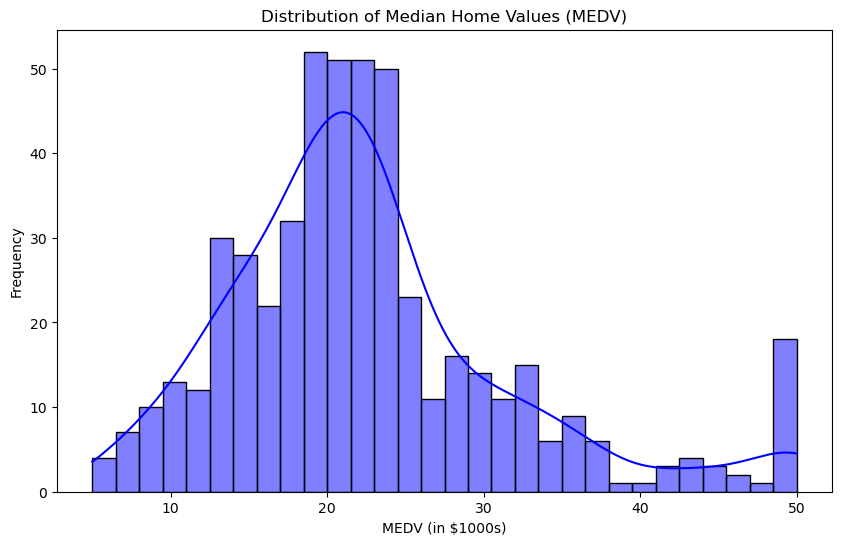

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True, color='blue')
plt.title('Distribution of Median Home Values (MEDV)')
plt.xlabel('MEDV (in $1000s)')
plt.ylabel('Frequency')
plt.show()

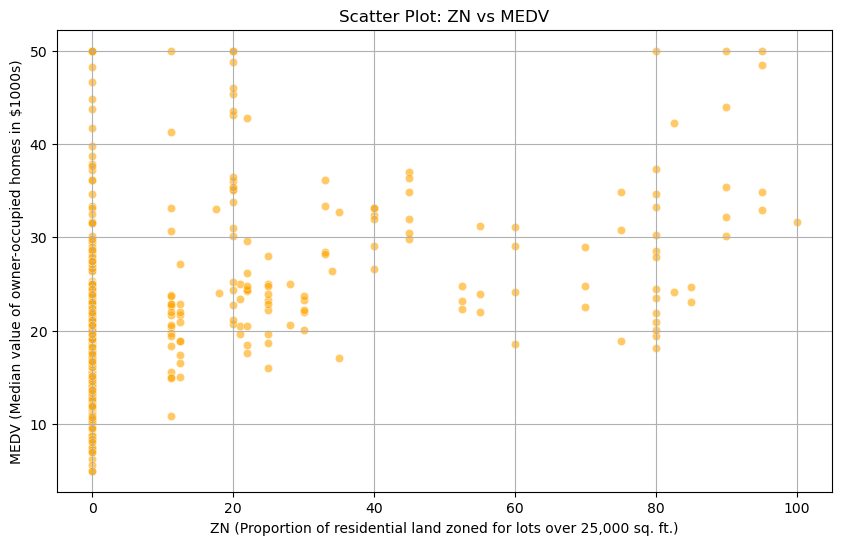

In [28]:
# Scatter plot of 'ZN' vs 'MEDV'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ZN', y='MEDV', data=df, color='orange', alpha=0.6)
plt.title('Scatter Plot: ZN vs MEDV')
plt.xlabel('ZN (Proportion of residential land zoned for lots over 25,000 sq. ft.)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

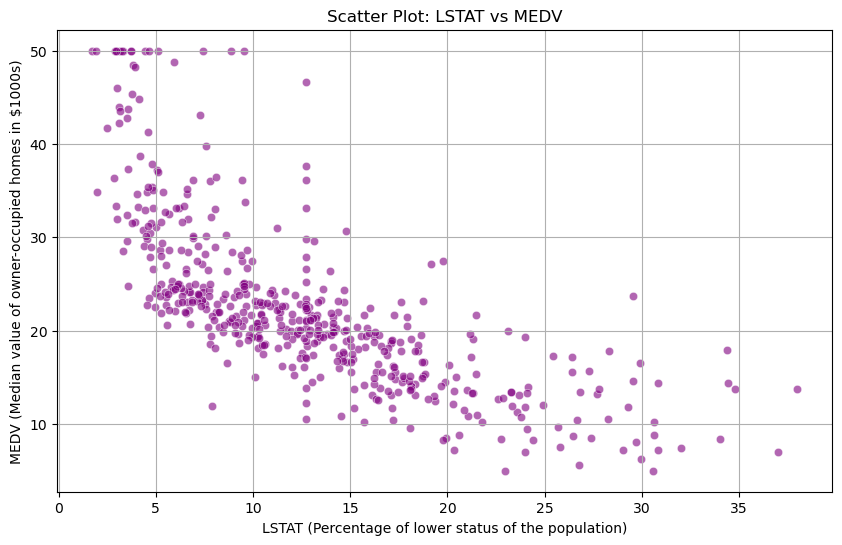

In [29]:
# Scatter plot of 'LSTAT' vs 'MEDV'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=df, color='purple', alpha=0.6)
plt.title('Scatter Plot: LSTAT vs MEDV')
plt.xlabel('LSTAT (Percentage of lower status of the population)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

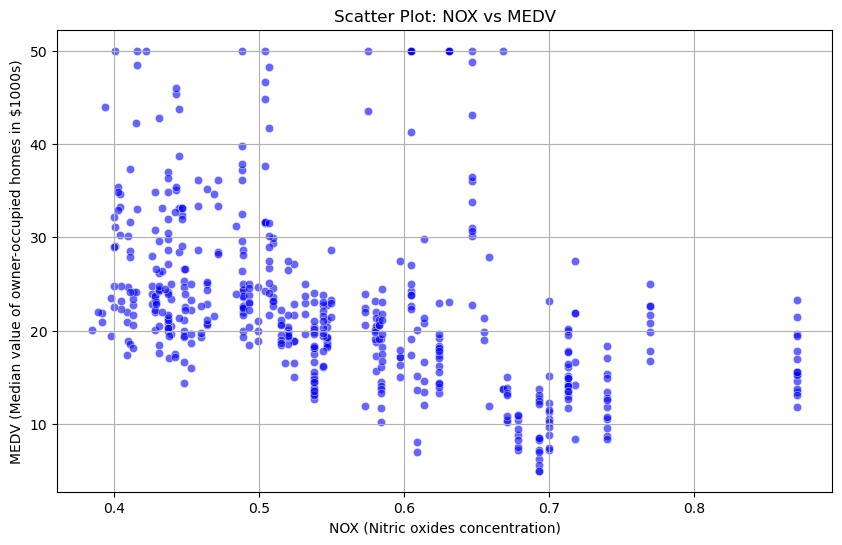

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='MEDV', data=df, color='blue', alpha=0.6)
plt.title('Scatter Plot: NOX vs MEDV')
plt.xlabel('NOX (Nitric oxides concentration)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

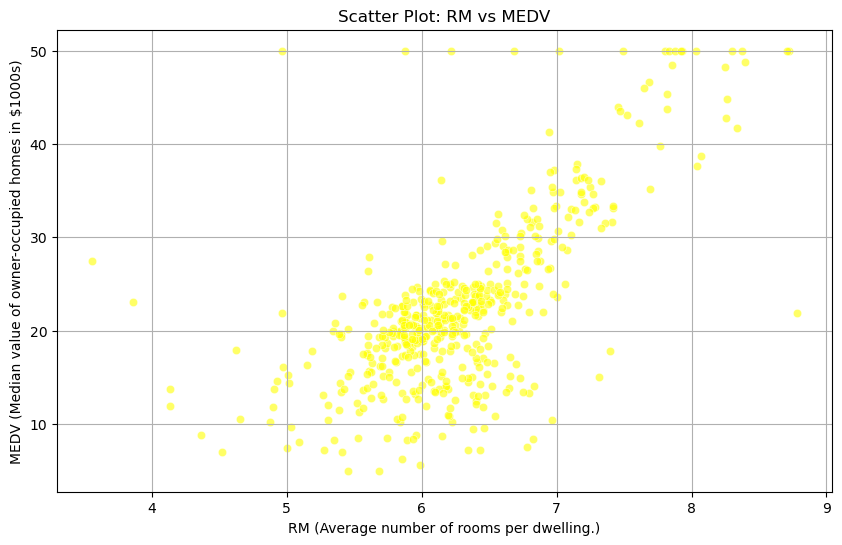

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=df, color='yellow', alpha=0.6)
plt.title('Scatter Plot: RM vs MEDV')
plt.xlabel('RM (Average number of rooms per dwelling.)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

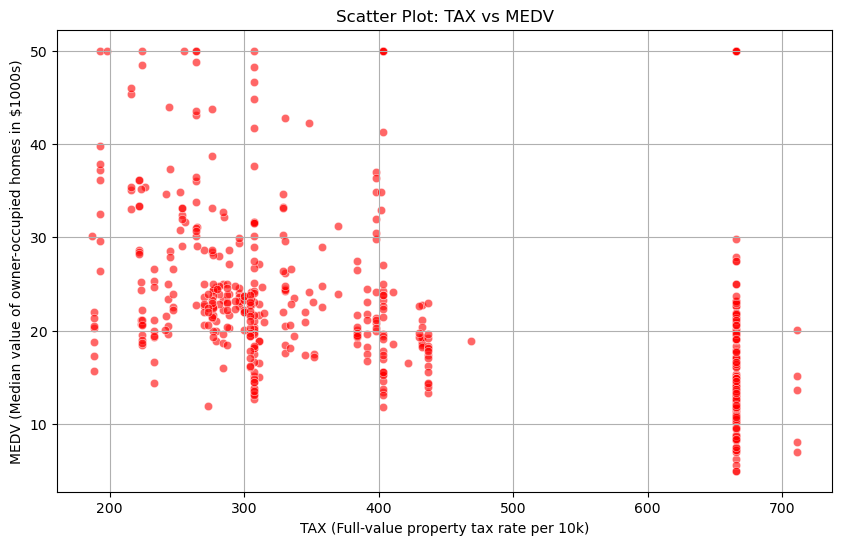

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TAX', y='MEDV', data=df, color='red', alpha=0.6)
plt.title('Scatter Plot: TAX vs MEDV')
plt.xlabel('TAX (Full-value property tax rate per 10k)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

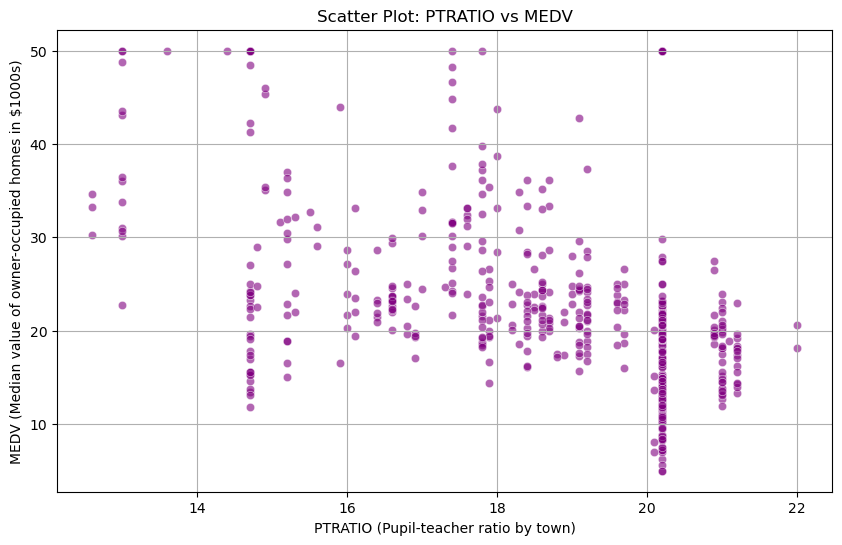

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PTRATIO', y='MEDV', data=df, color='purple', alpha=0.6)
plt.title('Scatter Plot: PTRATIO vs MEDV')
plt.xlabel('PTRATIO (Pupil-teacher ratio by town)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

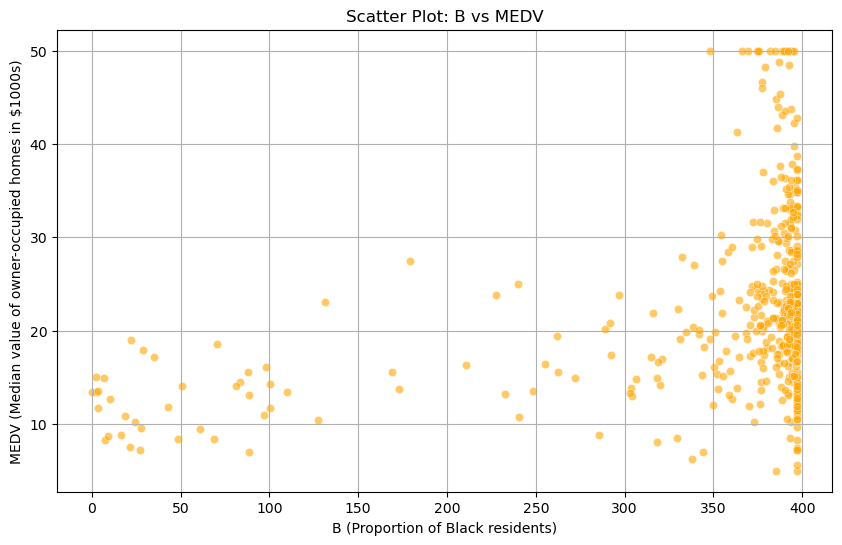

In [34]:
# Scatter plot of 'B' vs 'MEDV'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='B', y='MEDV', data=df, color='orange', alpha=0.6)
plt.title('Scatter Plot: B vs MEDV')
plt.xlabel('B (Proportion of Black residents)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

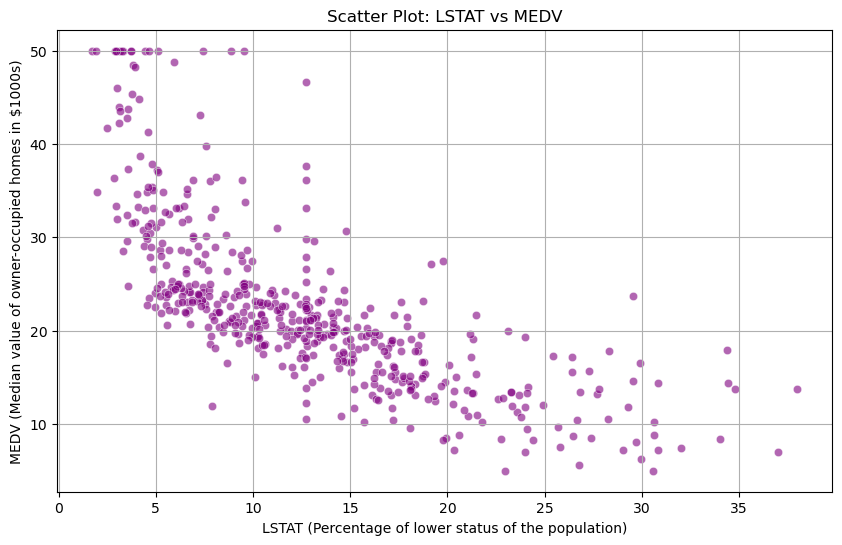

In [35]:
# Scatter plot of 'LSTAT' vs 'MEDV'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=df, color='purple', alpha=0.6)
plt.title('Scatter Plot: LSTAT vs MEDV')
plt.xlabel('LSTAT (Percentage of lower status of the population)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.grid(True)
plt.show()

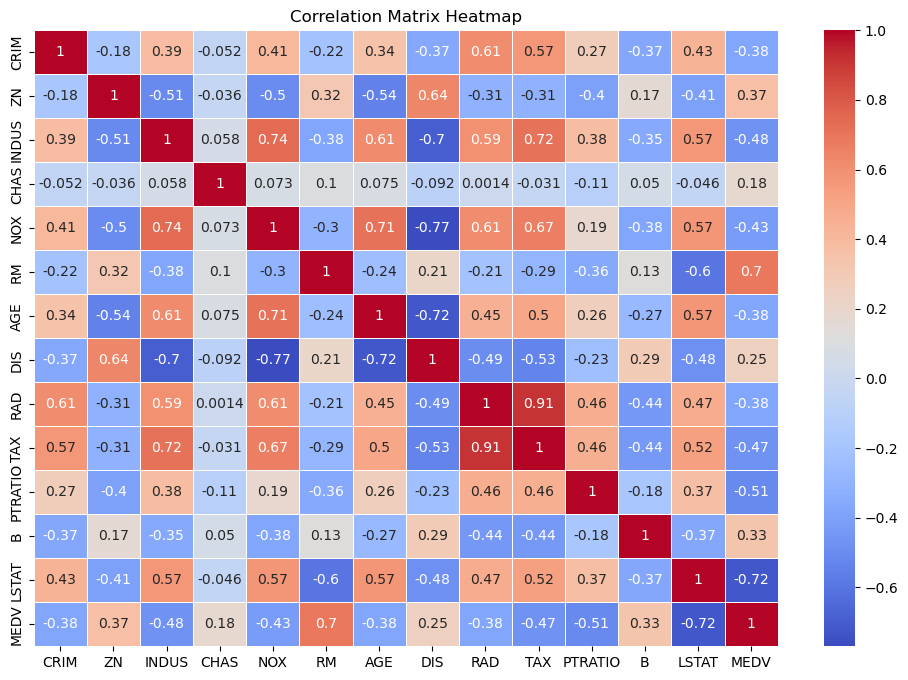

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Feature Selection Rationale

I chose the features ['ZN', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT'] for my analysis because these features exhibit a good correlation with the target variable 'MEDV' (median home values). The selection is based on the belief that collectively, these features contribute significantly to predicting the median home values, making them valuable for the analysis.

In [37]:
selected_features = ['ZN', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = df[selected_features]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 8)
Shape of X_test: (102, 8)
Shape of y_train: (404,)
Shape of y_test: (102,)


In [38]:
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

linear_predictions = linear_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

In [39]:
linear_r2 = r2_score(y_test, linear_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print("Linear Regression R2 Score:", linear_r2)
print("Decision Tree R2 Score:", decision_tree_r2)
print("Random Forest R2 Score:", random_forest_r2)

Linear Regression R2 Score: 0.5868787969239857
Decision Tree R2 Score: 0.7757901453577117
Random Forest R2 Score: 0.8198155607334273


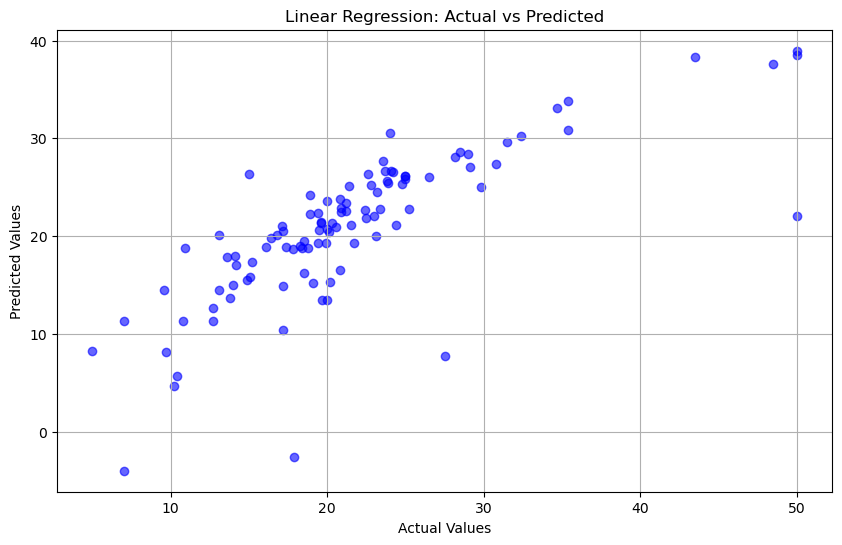

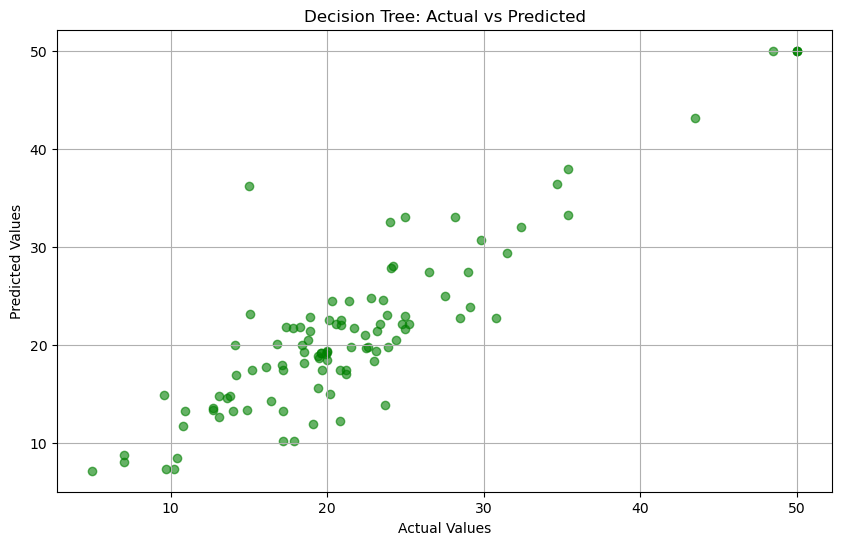

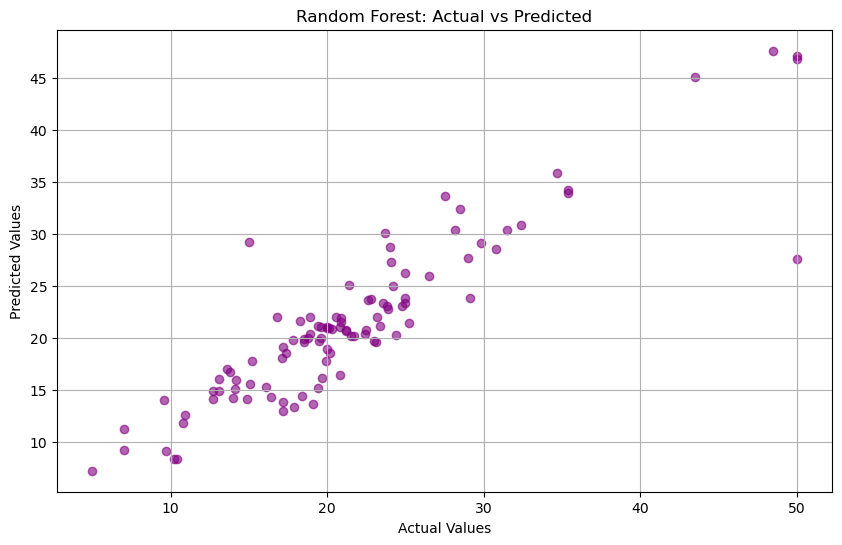

In [40]:
# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue', alpha=0.6)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Scatter plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, decision_tree_predictions, color='green', alpha=0.6)
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_forest_predictions, color='purple', alpha=0.6)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

## Conclusion:

`The project aims to provide insights into the predictive power of selected features on median home values. The identified features are expected to play a crucial role in predicting housing prices. The exploratory data analysis serves as a foundation for building and evaluating predictive models.`

`By focusing on feature selection based on correlation and employing scatter plots for visual analysis, this project lays the groundwork for further steps such as model building, training, and evaluation. The goal is to develop a predictive model that accurately estimates median home values, contributing valuable insights for real estate and housing market analysis.`